In [51]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")

In [52]:
songdata=pd.read_csv("songdata.csv")
songdata

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...


In [53]:
songdata.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


# Data set is so big so we are working with 10000 songs

In [54]:
songdata = songdata.sample(n=10000).drop('link', axis=1).reset_index(drop=True)


In [55]:
songdata

,artist,song,text
0,Regine Velasquez,Tell Me,There are nights \nWhen I can't help but cry ...
1,Our Lady Peace,Ordinary,Unreleased rarity played live \n \nDoes it h...
2,Queen,Pain Is So Close To Pleasure,"Ooh, ooh, pain is so close to pleasure, oh yea..."
3,Oscar Hammerstein,My Lord And Master,[Spoken] The King is pleased! \nHe is pleased...
4,Tragically Hip,Membership,Whether laying down yourself beside it \nOr s...
...,...,...,...
9995,Dream Theater,Status Seeker,Heart sick at the sight of the \nStatus Seeke...
9996,Bob Rivers,Pokemon,Pokemon mon mon mon \nLots of money mon mon m...
9997,Peter Cetera,Still Getting Over You,Since you went away \nCan't face the day \nJ...
9998,Horrible Histories,Cleopatra: I Can't Go On,"Deafeated by Octavian , who we , we don't resp..."


In [73]:
songdata.groupby(["artist"]).count()

,song,text
artist,,
'n Sync,23,23
ABBA,24,24
Ace Of Base,10,10
Adam Sandler,16,16
Adele,10,10
...,...,...
Zoegirl,11,11
Zornik,4,4
Zox,2,2


# Visualization

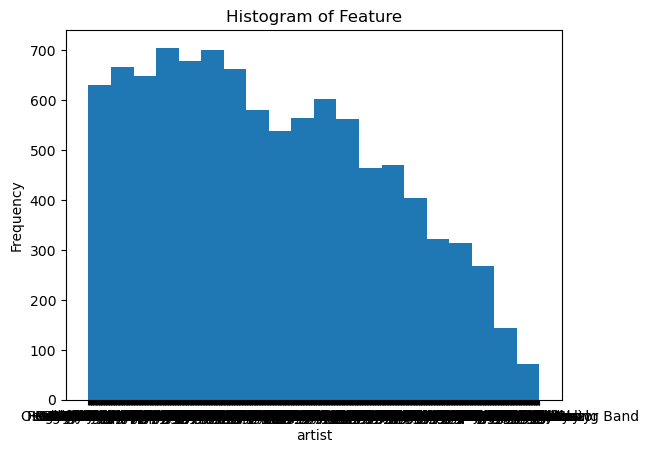

In [74]:
import matplotlib.pyplot as plt
plt.hist(songdata['artist'], bins=20)
plt.xlabel('artist')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')
plt.show()

# we observed that there is \n in text  are going to remove \n 

In [56]:
songdata['text'] = songdata['text'].str.replace(r'\n', '')

In [57]:
songdata

,artist,song,text
0,Regine Velasquez,Tell Me,There are nights When I can't help but cry A...
1,Our Lady Peace,Ordinary,Unreleased rarity played live Does it have ...
2,Queen,Pain Is So Close To Pleasure,"Ooh, ooh, pain is so close to pleasure, oh yea..."
3,Oscar Hammerstein,My Lord And Master,[Spoken] The King is pleased! He is pleased w...
4,Tragically Hip,Membership,Whether laying down yourself beside it Or sli...
...,...,...,...
9995,Dream Theater,Status Seeker,Heart sick at the sight of the Status Seeker ...
9996,Bob Rivers,Pokemon,Pokemon mon mon mon Lots of money mon mon mon...
9997,Peter Cetera,Still Getting Over You,Since you went away Can't face the day Just ...
9998,Horrible Histories,Cleopatra: I Can't Go On,"Deafeated by Octavian , who we , we don't resp..."


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [60]:
lyrics_matrix = tfidf.fit_transform(songdata['text'])


In [61]:
cosine_similarities = cosine_similarity(lyrics_matrix) 

In [62]:
cosine_similarities

array([[1.        , 0.        , 0.03070293, ..., 0.03687835, 0.03192392,
        0.02056404],
       [0.        , 1.        , 0.01842706, ..., 0.01199744, 0.00596097,
        0.0611488 ],
       [0.03070293, 0.01842706, 1.        , ..., 0.01861177, 0.01102796,
        0.01309854],
       ...,
       [0.03687835, 0.01199744, 0.01861177, ..., 1.        , 0.00342328,
        0.00350295],
       [0.03192392, 0.00596097, 0.01102796, ..., 0.00342328, 1.        ,
        0.01173366],
       [0.02056404, 0.0611488 , 0.01309854, ..., 0.00350295, 0.01173366,
        1.        ]])

In [ ]:
# Now we'll sort each element in cosine_similarities and get the indexes of the songs. 
## After that, we'll store in similarities each name of the 50 most similar songs.
# Except the first one that is the same song.

In [64]:
similarities = {}
for i in range(len(cosine_similarities)):
    
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 

    similarities[songdata['song'].iloc[i]] = [(cosine_similarities[i][x], songdata['song'][x], songdata['artist'][x]) for x in similar_indices][1:]

In [ ]:
# After that, We can use that similarity scores to access the most similar items and give a recommendation.

# For that, we'll define our Content based recommender class.


In [65]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, recommendation):
        song = recommendation['song']
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        # print each item
        self._print_message(song=song, recom_song=recom_song)

In [66]:
recommedations = ContentBasedRecommender(similarities)

In [67]:
recommedations

In [68]:
recommendation = {
    "song": songdata['song'].iloc[100],
    "number_songs": 4 
}

In [69]:
recommedations.recommend(recommendation)

The 4 recommended songs for Rock 'n Roll Rebel are:
Number 1:
It's Only Rock N Roll by Rolling Stones with 0.404 similarity score
--------------------
Number 2:
Come On by Whitesnake with 0.385 similarity score
--------------------
Number 3:
Long Live Rock 'n' Roll by Rainbow with 0.376 similarity score
--------------------
Number 4:
Top Of The Bill by Scorpions with 0.367 similarity score
--------------------


In [70]:
recommendation2 = {
    "song": songdata['song'].iloc[200],
    "number_songs": 4 
}

In [71]:
recommedations.recommend(recommendation2)

The 4 recommended songs for Heartlight are:
Number 1:
Gold Lion by Yeah Yeah Yeahs with 0.488 similarity score
--------------------
Number 2:
4 Broken Hearts by Norah Jones with 0.479 similarity score
--------------------
Number 3:
The Great Pretender by Queen with 0.477 similarity score
--------------------
Number 4:
It's Over by Phil Collins with 0.47 similarity score
--------------------
